# EVENT DATA EXPLORATION

**Here I did a brief exploration of the events data. One plot that stood out to me was the discrepancy between the counts of job views to the count of job applications. If we asume that anyone viewing a job is genuinely  interested in submitting an application, then this huge might signify a mismatch between job summaries and the full job contents.**

### Hypothesis: 
**Improving the match between job category and the job content could help convert more job views to applications.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

sns.set_theme()

In [5]:
data_events = pd.read_csv('../data/raw/ads-50k-events.csv')
data_events.head()

,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01T08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01T08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01T08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01T08:42:05,158655,38847632,IOS_APP,V


In [6]:
data_events.shape

(4304688, 5)

In [7]:
data_events_copy = data_events.copy()

#### Add the count of job and resume ids

In [8]:
data_events_copy['job_id_count'] = data_events_copy.groupby('job_id')['job_id'].transform('count')
data_events_copy['resume_id_count'] = data_events_copy.groupby('resume_id')['resume_id'].transform('count')
data_events_copy.head()

,event_datetime,resume_id,job_id,event_platform,kind,job_id_count,resume_id_count
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,201,108
1,2021-05-01T08:42:05,158655,38901970,IOS_APP,V,201,108
2,2021-05-01T08:42:05,158655,38919645,IOS_APP,V,201,108
3,2021-05-01T08:42:05,158655,38928402,IOS_APP,V,201,108
4,2021-05-01T08:42:05,158655,38847632,IOS_APP,V,201,108


In [9]:
data_events_copy.shape

(4304688, 7)

In [10]:
platforms = list(data_events_copy.event_platform.unique())
platforms

['IOS_APP', 'ANDROID_APP', 'WEB']

In [11]:
# V: view, A: application
kinds = list(data_events_copy.kind.unique())
kinds

['V', 'A']

In [12]:
# split the date and time to year, month, day and hour
data_events_copy['event_datetime'] = pd.to_datetime(data_events_copy['event_datetime'])
data_events_copy['year'] = data_events_copy['event_datetime'].dt.year
data_events_copy['month'] = data_events_copy['event_datetime'].dt.month
data_events_copy['day'] = data_events_copy['event_datetime'].dt.day
data_events_copy['hour'] = data_events_copy['event_datetime'].dt.hour
data_events_copy.head()

,event_datetime,resume_id,job_id,event_platform,kind,job_id_count,resume_id_count,year,month,day,hour
0,2021-05-01 08:42:05,158655,38820886,IOS_APP,V,201,108,2021,5,1,8
1,2021-05-01 08:42:05,158655,38901970,IOS_APP,V,201,108,2021,5,1,8
2,2021-05-01 08:42:05,158655,38919645,IOS_APP,V,201,108,2021,5,1,8
3,2021-05-01 08:42:05,158655,38928402,IOS_APP,V,201,108,2021,5,1,8
4,2021-05-01 08:42:05,158655,38847632,IOS_APP,V,201,108,2021,5,1,8


In [13]:
data_events_copy.shape

(4304688, 11)

In [14]:
list(data_events_copy.year.unique())

[2021]

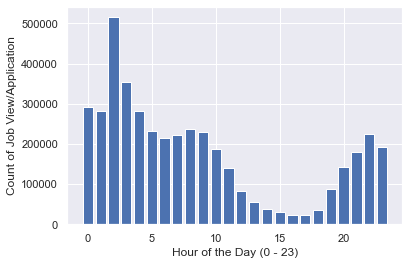

In [15]:
event_hour_count_dict = dict(Counter(data_events_copy.hour))
event_hour, count = zip(*[(hour, count) for hour, count in event_hour_count_dict.items()])
plt.bar(event_hour, count)
plt.ylabel('Count of Job View/Application')
_ = plt.xlabel('Hour of the Day (0 - 23)')

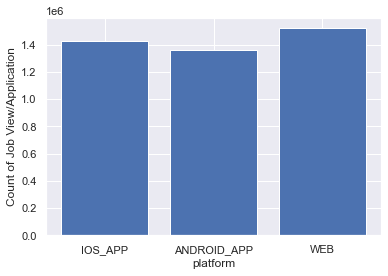

In [16]:
event_platform_count_dict = dict(Counter(data_events_copy.event_platform))
event_platform, count = zip(*[(platform, count) for platform, count in event_platform_count_dict.items()])
plt.bar(event_platform, count)
plt.ylabel('Count of Job View/Application')
_ = plt.xlabel('platform')

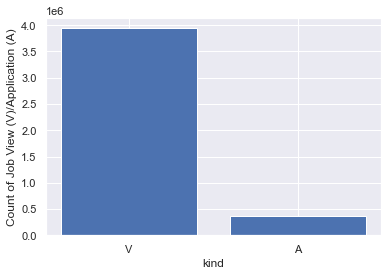

In [17]:
event_kind_count_dict = dict(Counter(data_events_copy.kind))
event_kind, count = zip(*[(kind, count) for kind, count in event_kind_count_dict.items()])
plt.bar(event_kind, count)
plt.ylabel('Count of Job View (V)/Application (A)')
_ = plt.xlabel('kind')

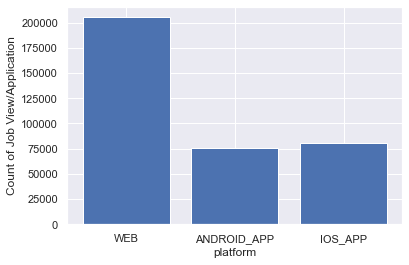

In [18]:
# Only applied jobs

applied_jobs = data_events_copy[data_events_copy['kind']=='A']
event_platform_count_dict = dict(Counter(applied_jobs.event_platform))
event_platform, count = zip(*[(platform, count) for platform, count in event_platform_count_dict.items()])
plt.bar(event_platform, count)
plt.ylabel('Count of Job View/Application')
_ = plt.xlabel('platform')

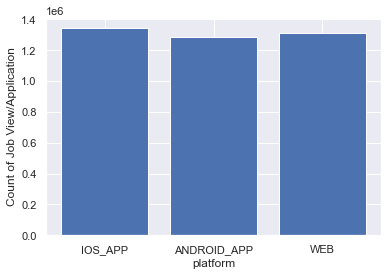

In [19]:
# Only viewed jobs

viewed_jobs = data_events_copy[data_events_copy['kind']=='V']
event_platform_count_dict = dict(Counter(viewed_jobs.event_platform))
event_platform, count = zip(*[(platform, count) for platform, count in event_platform_count_dict.items()])
plt.bar(event_platform, count)
plt.ylabel('Count of Job View/Application')
_ = plt.xlabel('platform')